In [10]:
# import umap
from disentangledsg import DisentangledSG
import torch
from datamodules import MNISTDataModule

In [11]:
model = DisentangledSG.load_from_checkpoint("checkpoints/36zl3vft-last.ckpt")
model = model.to('cuda:0')

Global seed set to 42


In [12]:
mnist = MNISTDataModule()
mnist.prepare_data()
mnist.setup()

In [13]:
iter = mnist.val_dataloader().__iter__()


In [14]:
latents = []
labels = []

#val = iter.next()
with torch.no_grad():
    for val in mnist.val_dataloader():
        x = val[0].to('cuda:0')
        y = val[1]

        w = model.encoder(x).to('cpu')

        latents.append(w)
        labels.append(y)


/home/ocean/disentangling_gan/disentangling-stylegan2/op/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.11.0+cu113. Falling back to torch.nn.functional.conv2d().
  warnings.warn(


In [15]:
W = torch.concat(latents, dim=0).numpy()
Y = torch.concat(labels, dim=0).numpy()

In [19]:
import umap.umap_ as umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(W)

In [20]:
colors = ['red', 'green', 'blue', 'gray', 'yellow', 'cyan', 'orange', 'black', 'purple', 'greenyellow']
c = [colors[i] for i in Y]

No handles with labels found to put in legend.


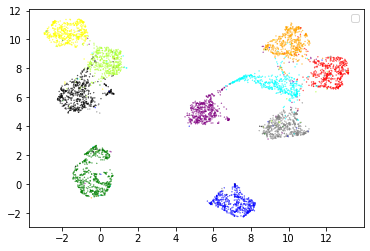

In [24]:
import matplotlib.pyplot as plt
plt.scatter(embedding[:, 0], embedding[:, 1], c=c, s=0.1)
plt.legend()